<a href="https://colab.research.google.com/github/joylin0209/final-project/blob/main/final_project_cow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 1. Load the Data

Crawl the data from a Taiwan online forum,"Ptt", by searching the articles include the key word "cow".

In [ ]:
!pip install requests_html
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00


I first wrote a function about how to capture the content and information of a single article.

Then, there are many article in a same page, we can only see the tittle of the article, so I wrote another function to get each article information and text.

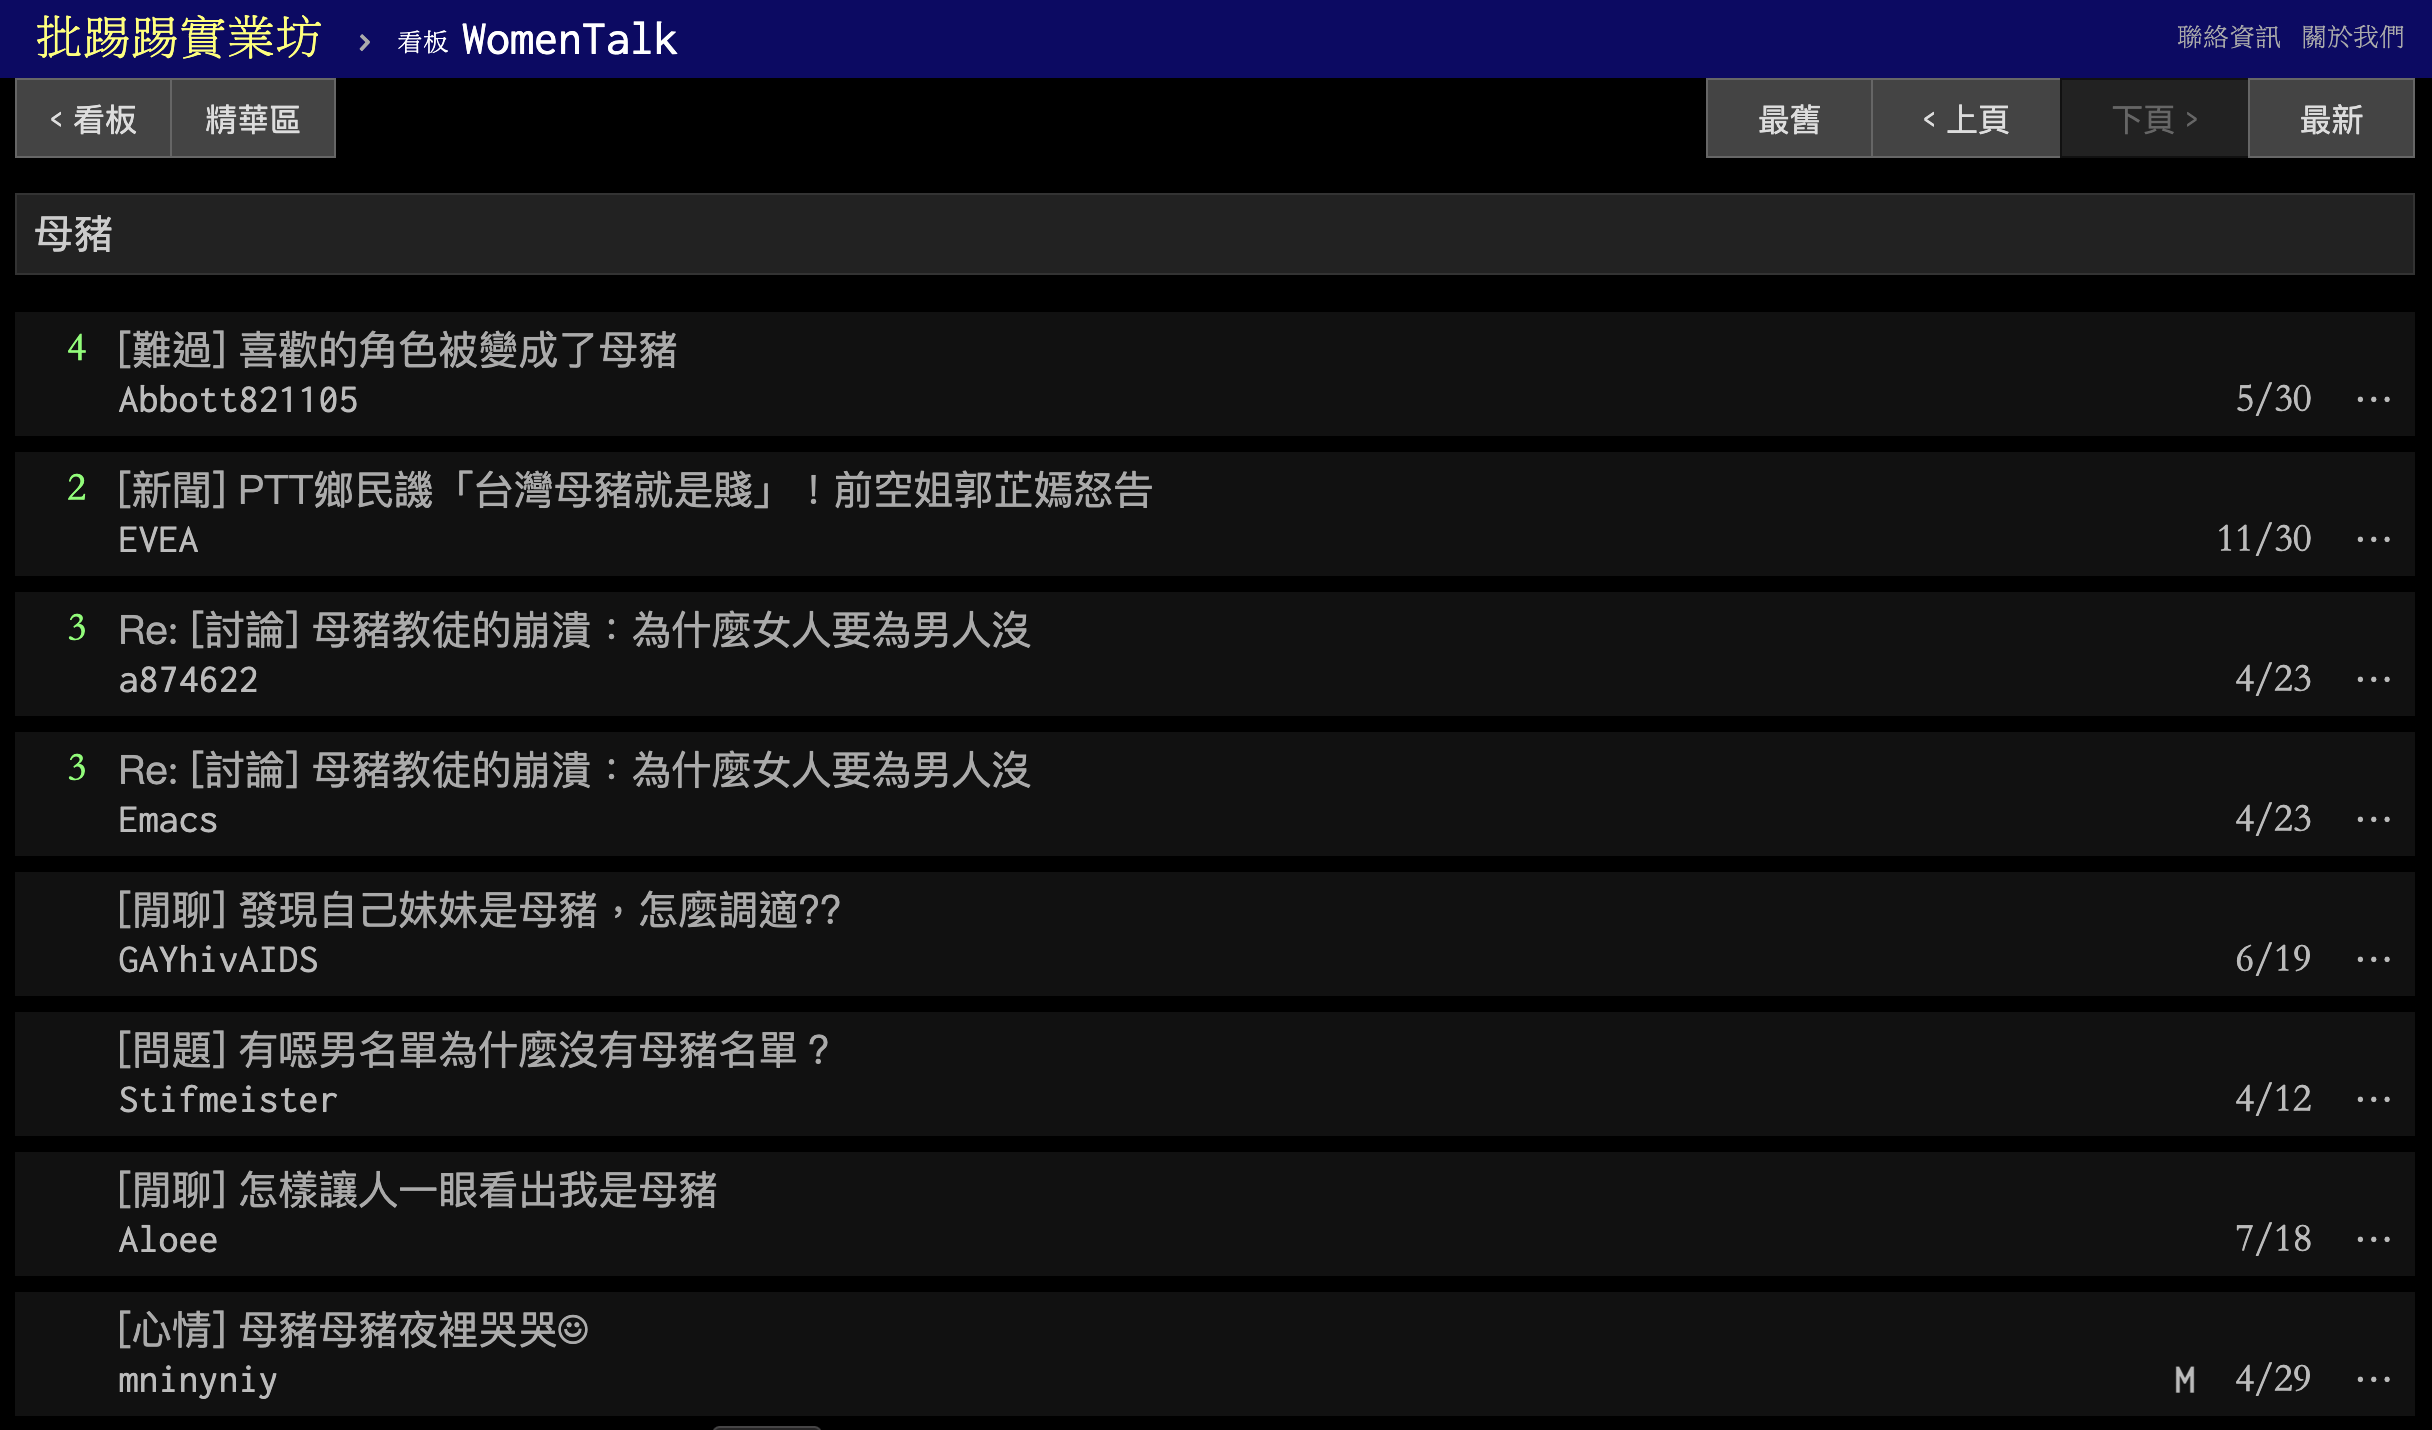

In [ ]:
import pandas as pd
import bs4
import requests
from requests_html import HTML
import re
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

ua = UserAgent()

res = requests.get("https://www.google.com/", headers={
    "User-Agent": ua.random
})


In [ ]:
#the process of scrap one post from ppt

def get_ptt(url):
    # set up the Header and Cookie
    my_headers = {'cookie': 'over18=1;'}
    # sen get request ptt gossip board
    response = requests.get(url, headers=my_headers)

    # put URL into bs4model analysis
    soup = bs4.BeautifulSoup(response.text, "html.parser")

    # PTT columns
    header = soup.find_all('span', 'article-meta-value')

    # auther
    ptt_author = header[0].text
    # board
    ptt_board = header[1].text
    # tittle
    ptt_title = header[2].text
    # date
    ptt_date = header[3].text


    main_container = soup.find(id='main-container')
    # scrap all the text
    all_text = main_container.text
    pre_text = all_text.split('--')[0]

    texts = pre_text.split('\n')
    contents = texts[2:]
    ptt_content = '\n'.join(contents)

    # save the result to DataFrame
    df = pd.DataFrame({
        'author': [ptt_author],
        'board': [ptt_board],
        'tittle': [ptt_title],
        'date': [ptt_date],
        'content': [ptt_content],
    })

    return df, ptt_content  # 返回 DataFrame 和 ptt_content

# 使用示例
url = "https://www.ptt.cc/bbs/Gossiping/M.1705835580.A.750.html"
result_df, ptt_content = get_ptt(url)
print(result_df)
print(ptt_content)

           author      board                tittle                      date  \
0  ashilol (ting)  Gossiping  [問卦] 捷運有母豬一直擠我要怎麼處理？  Sun Jan 21 19:12:58 2024   

                                             content  
0  安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...  
安安吶

肥肥捷運正坐的好好的

他媽突然一隻肥母豬硬要坐進來

我已經跟右邊牆壁幾乎貼在一起了

她還是一直緊貼我大腿

嘔嘔嘔真的要吐了

現在怎麼辦？
https://i.imgur.com/MqBZYfV.jpeg



In [ ]:
def get_ptt_article_info(url):
    my_headers = {'cookie': 'over18=1;'}
    response = requests.get(url, headers=my_headers)


    soup = bs4.BeautifulSoup(response.text, "html.parser")

    header = soup.find_all('span', 'article-meta-value')
    author = header[0].text
    board = header[1].text
    title = header[2].text
    date_text = header[3].text
    date_match = re.search(r'(\w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    main_container = soup.find(id='main-container')
    all_text = main_container.text
    pre_text = all_text.split('--')[0]

    texts = pre_text.split('\n')
    contents = texts[2:]
    content = '\n'.join(contents)

    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'text': [ptt_content],
    })

    return df


urls = [
    "https://www.ptt.cc/bbs/Gossiping/M.1705835580.A.750.html","https://www.ptt.cc/bbs/Boy-Girl/M.1701610428.A.229.html","https://www.ptt.cc/bbs/Gossiping/M.1705413756.A.9A1.html","https://www.ptt.cc/bbs/Gossiping/M.1705030701.A.667.html"
]

df_list = []


for url in urls:
    result_df = get_ptt_article_info(url)
    df_list.append(result_df)


final_df = pd.concat(df_list, ignore_index=True)


print(final_df)

                 author      board                    tittle     date  \
0        ashilol (ting)  Gossiping      [問卦] 捷運有母豬一直擠我要怎麼處理？  2024-01   
1  iamjimhaha (磨刀霍霍向肥羊)   Boy-Girl     [討論] 找台女不找外配是不是因為不想養？            
2       davidex (玉藻前我的)  Gossiping  [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」  2024-01   
3         vi000246 (Vi)  Gossiping             [問卦] 黑鏡有一集幹母豬  2024-01   

                                                text  
0  安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...  
1  安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...  
2  安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...  
3  安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...  


In [ ]:
def get_article_links(url):

    my_headers = {'cookie': 'over18=1;'}

    response = requests.get(url, headers=my_headers)


    soup = BeautifulSoup(response.text, "html.parser")


    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links


search_url = "https://www.ptt.cc/bbs/Gossiping/search?q=%E6%AF%8D%E8%B1%AC"


article_links = get_article_links(search_url)


for link in article_links:
    print(link)


https://www.ptt.cc/bbs/Gossiping/M.1708685653.A.C0F.html
https://www.ptt.cc/bbs/Gossiping/M.1705835580.A.750.html
https://www.ptt.cc/bbs/Gossiping/M.1705540974.A.2BD.html
https://www.ptt.cc/bbs/Gossiping/M.1705413756.A.9A1.html
https://www.ptt.cc/bbs/Gossiping/M.1705030701.A.667.html
https://www.ptt.cc/bbs/Gossiping/M.1704517654.A.F41.html
https://www.ptt.cc/bbs/Gossiping/M.1703734073.A.5CE.html
https://www.ptt.cc/bbs/Gossiping/M.1703243718.A.480.html
https://www.ptt.cc/bbs/Gossiping/M.1703218497.A.373.html
https://www.ptt.cc/bbs/Gossiping/M.1700731840.A.329.html
https://www.ptt.cc/bbs/Gossiping/M.1700388007.A.3DB.html
https://www.ptt.cc/bbs/Gossiping/M.1699594528.A.129.html
https://www.ptt.cc/bbs/Gossiping/M.1699107328.A.A0A.html
https://www.ptt.cc/bbs/Gossiping/M.1699105740.A.E24.html
https://www.ptt.cc/bbs/Gossiping/M.1698990839.A.F8A.html
https://www.ptt.cc/bbs/Gossiping/M.1698672842.A.546.html
https://www.ptt.cc/bbs/Gossiping/M.1698587823.A.32B.html
https://www.ptt.cc/bbs/Gossipin

In [ ]:
Next, I merged the functions and started collecting articles from each board

In [ ]:
def get_ptt_article_info(url):

    my_headers = {'cookie': 'over18=1;'}

    response = requests.get(url, headers=my_headers)

    soup = BeautifulSoup(response.text, "html.parser")

    header = soup.find_all('span', 'article-meta-value')
    author = header[0].text
    board = header[1].text
    title = header[2].text
    date_text = header[3].text
    date_match = re.search(r'(\w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    main_container = soup.find(id='main-container')
    all_text = main_container.text
    pre_text = all_text.split('--')[0]


    texts = pre_text.split('\n')

    contents = texts[2:]
    content = '\n'.join(contents)


    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'text': [content],
    })

    return df

def get_article_links(url):

    my_headers = {'cookie': 'over18=1;'}

    response = requests.get(url, headers=my_headers)


    soup = BeautifulSoup(response.text, "html.parser")

    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def get_ptt_data_frame(search_url):

    article_links = get_article_links(search_url)


    df_list = []


    for url in article_links:
        result_df = get_ptt_article_info(url)
        df_list.append(result_df)


    final_df = pd.concat(df_list, ignore_index=True)

    return final_df


gossip_df = get_ptt_data_frame(search_url)
print(gossip_df)


                       author      board                      tittle     date  \
0         ptt987654321 (大谷躺平)  Gossiping     [問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?  2024-02   
1              ashilol (ting)  Gossiping        [問卦] 捷運有母豬一直擠我要怎麼處理？  2024-01   
2                 kent (大屌肯特)  Gossiping     [新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬  2024-01   
3             davidex (玉藻前我的)  Gossiping    [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」  2024-01   
4               vi000246 (Vi)  Gossiping               [問卦] 黑鏡有一集幹母豬  2024-01   
5         yushenglu (子欲養而親不待)  Gossiping        [問卦] 快8年了,母豬一直聽不懂人話?            
6             TOMMY75410 (禿米)  Gossiping     [問卦] 我朋友去陳情，母豬還在睡怎麼辦^_^  2023-12   
7      ggian123 (釣白癡&散播仇恨專用帳)  Gossiping       [問卦] CCR崇洋母豬話都講不好 吃屎吧  2023-12   
8         ilovecat5566 (....)  Gossiping     [問卦] 被母豬騙3次的人在想什麼？ 有沒有卦  2023-12   
9             ubang (長得醜卻想得美)  Gossiping        [問卦] 是死豬還是死母豬不怕滾水燙？？  2023-11   
10  Max0406 (LeGOATKingJames)  Gossiping    [問卦] Skylar Vox 變成肥滋滋的母豬  2023-11   
11      j8004150560 (jumpyou

In [ ]:
def remove_patterns(text):
    text = re.sub(r'^※.*\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^:.*\n', '', text, flags=re.MULTILINE)
    return text


def get_ptt_article_info(url):

    my_headers = {'cookie': 'over18=1;'}
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # PTT 上方4個欄位
    header = soup.find_all('span', 'article-meta-value')

    # 检查 header 是否为空，如果为空，返回一个默认值的 DataFrame
    if not header or len(header) != 4:
        return pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'text': ['N/A'],
        })

    # 作者
    author = header[0].text
    # 看版
    board = header[1].text
    # 標題
    title = header[2].text

    # 提取日期中的年份和月份
    date_text = header[3].text
    date_match = re.search(r'(\w{3} (\s\d{1}|\d{2}) \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    # 類型
    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    # 查找所有html 元素 抓出內容
    main_container = soup.find(id='main-container')

    # 把所有文字都抓出來
    all_text = ' '.join([remove_patterns(container.text) for container in main_container])

    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]

    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    # 存儲到 DataFrame
    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'text': [content],
    })

    return df


def get_article_links(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 表特版搜尋頁面
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4 模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # 找出所有文章連結
    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def process_urls(urls):
    # 存儲到 DataFrame 的列表
    df_list = []
    article_links = get_article_links(search_url)
    # 循环处理每个链接
    for url in urls:
        # 获取文章信息 DataFrame
        article_links = get_article_links(url)
        for link in article_links:
          result_df = get_ptt_article_info(link)
          # 检查是否为默认值，如果不是再添加到结果列表
          if not result_df.equals(pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'text': ['N/A'],
          })):
              df_list.append(result_df)

    # 合并所有 DataFrame
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# 构造链接列表
base_url = "https://www.ptt.cc/bbs/Gossiping/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 11  # 设置目标页数

# 构造链接列表
urls_to_process = [base_url.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultgossip_df = process_urls(urls_to_process)

# 打印最终的 DataFrame
print(resultgossip_df)



                  author      board                    tittle     date  \
0    ptt987654321 (大谷躺平)  Gossiping   [問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?  2024-02   
1         ashilol (ting)  Gossiping      [問卦] 捷運有母豬一直擠我要怎麼處理？  2024-01   
2            kent (大屌肯特)  Gossiping   [新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬  2024-01   
3        davidex (玉藻前我的)  Gossiping  [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」  2024-01   
4          vi000246 (Vi)  Gossiping             [問卦] 黑鏡有一集幹母豬  2024-01   
..                   ...        ...                       ...      ...   
215    ntlutw (Louis888)  Gossiping         [問卦] 是不是不能對母豬比中指？  2023-10   
216       Kidd00 (~@_@~)  Gossiping       [問卦] 對老母豬比中指會發生什麼事？  2023-10   
217     taot917 (每天一點新鮮)  Gossiping          [問卦] 為什麼沒人殺大母豬？？  2023-10   
218   shampoopoo (毛寶洗髮精)  Gossiping              [問卦] 我會變成母豬嗎  2023-10   
219        indoman (橄欖趴)  Gossiping               [問卦] 母豬清的完嗎  2023-10   

    article_type                                               text  
0             問卦  有一句話叫做\n狗去豬來\n反過來就是\n豬去

In [ ]:
def remove_patterns(text):
    text = re.sub(r'^※.*\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^:.*\n', '', text, flags=re.MULTILINE)
    return text


def get_ptt_article_info(url):

    my_headers = {'cookie': 'over18=1;'}
    response = requests.get(url, headers=my_headers)


    soup = BeautifulSoup(response.text, "html.parser")


    header = soup.find_all('span', 'article-meta-value')


    if not header or len(header) != 4:
        return pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'text': ['N/A'],
        })

    author = header[0].text
    board = header[1].text
    title = header[2].text
    date_text = header[3].text
    date_match = re.search(r'(\w{3} (\s\d{1}|\d{2}) \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    main_container = soup.find(id='main-container')
    all_text = ' '.join([remove_patterns(container.text) for container in main_container])


    pre_text = all_text.split('--')[0]


    texts = pre_text.split('\n')

    contents = texts[2:]
    content = '\n'.join(contents)


    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'text': [content],
    })

    return df


def get_article_links(url):
    # Header and Cookie
    my_headers = {'cookie': 'over18=1;'}

    response = requests.get(url, headers=my_headers)

    soup = BeautifulSoup(response.text, "html.parser")

    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def process_urls(urls):

    df_list = []
    article_links = get_article_links(search_url)
    # 循环处理每个链接
    for url in urls:
        # 获取文章信息 DataFrame
        article_links = get_article_links(url)
        for link in article_links:
          result_df = get_ptt_article_info(link)
          # 检查是否为默认值，如果不是再添加到结果列表
          if not result_df.equals(pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'text': ['N/A'],
          })):
              df_list.append(result_df)

    # 合并所有 DataFrame
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# 构造链接列表
base_url = "https://www.ptt.cc/bbs/C_Chat/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 2  # 设置目标页数

# 构造链接列表
urls_to_process = [base_url.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
cchat_df = process_urls(urls_to_process)

# 打印最终的 DataFrame
print(cchat_df)


                      author   board                      tittle     date  \
0            mikasamikoto ()  C_Chat             [芙莉蓮] 肥倫是不是母豬啊？  2024-02   
1            mikasamikoto ()  C_Chat             [間諜] 安妮亞484母豬啊？  2024-02   
2               astrayzip ()  C_Chat             [討論] 有沒有出現母豬的作品  2024-01   
3              RueiRing (紫艾)  C_Chat          Re: [討論] 美冴是不是母豬阿？  2024-01   
4   a000209898 (吾低端雜碎 但自有天佑)  C_Chat              [討論] 美冴是不是母豬阿？  2024-01   
5          sos976431 (淡江金城武)  C_Chat        [閒聊] 原來真的有女孩兒喜歡被叫母豬嗎  2023-12   
6             GNXY903VW (00)  C_Chat     [情報]紳士寶貝！好評瑟瑟抓寶《ヤリステメスブ  2023-12   
7            mikasamikoto ()  C_Chat          [巨人]尤彌爾根本就宇宙級大母豬吧？  2023-11   
8        basala5417 (basala)  C_Chat  [情報] 類寶O夢遊戲〔幹完就丟的母豬〕將登STEA  2023-09   
9               Daihao (TDH)  C_Chat          Re: [閒聊] 母豬太太 增量篇！  2023-08   
10              s50189 (咕嚕米)  C_Chat          Re: [閒聊] 母豬太太 增量篇！  2023-08   
11              s50189 (咕嚕米)  C_Chat         [閒聊] 大家都喜歡太太嗎？那母豬呢？  2023-08   

In [ ]:
#Article link list
base_url2 = "https://www.ptt.cc/bbs/HatePolitics/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 2 #last page


urls_to_process2 = [base_url2.format(page) for page in range(start_page, end_page + 1)]

hatep_df = process_urls(urls_to_process2)

print(hatep_df)

                    author         board                     tittle     date  \
0            hittler (西斯特)  HatePolitics      [討論] 周處除三害的地下女醫師很像母豬?  2024-03   
1          AMDMARSHAL (火車)  HatePolitics   [黑特] 蔡母豬跟台獨龜孫發文關心自殺憲兵沒有？  2024-03   
2      yoyoflag (粗暴言論勢在必行)  HatePolitics  [討論] 新的一年 想改成吃素 降伏母豬與缺德妖孽  2024-02   
3      yoyoflag (粗暴言論勢在必行)  HatePolitics    [黑特] 母豬蔡英文、禽獸賴缺德 要毒害台灣！  2024-02   
4        gogobar (GOGOBAR)  HatePolitics       [討論] 母豬党真的都是玻璃心耶XDDD  2024-01   
5        gogobar (GOGOBAR)  HatePolitics           [黑特] 母豬党是不是贏不起啊？  2024-01   
6        cidexin (猩宿老詹愛碰風)  HatePolitics    [討論] 菜母豬可以看甄嬛傳，學生不能跳科目三  2024-01   
7        gogobar (GOGOBAR)  HatePolitics          [黑特] 母豬党發動網軍網路海巡囉  2024-01   
8        gogobar (GOGOBAR)  HatePolitics        [討論] 笑死，母豬菊被民眾嗆去死XD  2024-01   
9          yata4547 (yata)  HatePolitics           [討論] 垃圾蔡母豬 垃圾冥禁擋  2024-01   
10       besthorse (超級棒洨馬)  HatePolitics              [討論] 母豬叫代表什麼   2024-01   
11        honor1991 (欲言又止)  HatePolitics

In [ ]:
#article link
base_url3 = "https://www.ptt.cc/bbs/sex/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 2 # last page


urls_to_process3 = [base_url3.format(page) for page in range(start_page, end_page + 1)]

sex_df = process_urls(urls_to_process3)


print(sex_df)

                    author board                                 tittle  \
0   CTC0115 (Blank space~)   sex               [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」   
1    LeeAnAn (就值得了愛，就值得了等)   sex                   Fw: [心得] 小母豬與小母狗調教心得   
2            iamtony (蔡桶泥)   sex              [閒聊] 蔡桶泥班長話當年 當兵兩三年 母豬賽貂蟬   
3         f1935tpl (三民李連杰)   sex               [心得] 慟! 李連杰遭5隻金髮洋龍洋母豬輪姦!   
4               Scorpio ()   sex                  [新聞] 公務員在飲水機灌「母豬發情素」！   
5          kawazakiz2 (輪蛇)   sex  [新聞] 陸公務員在同事飲水放「母豬發情素」　害女同事狂懷孕、男同事超亢奮   
6            rescueme (小平)   sex                           [創作] 母豬獵人第八章   
7            rescueme (小平)   sex                           [創作] 母豬獵人第七章   
8            rescueme (小平)   sex                           [創作] 母豬獵人第六章   
9            rescueme (小平)   sex                           [創作] 母豬獵人第五章   
10           rescueme (小平)   sex                           [創作] 母豬獵人第四章   
11           rescueme (小平)   sex                           [創作] 母豬獵人第三章   
12           rescueme (小平

In [ ]:
#article link
base_url4 = "https://www.ptt.cc/bbs/Boy-Girl/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 1

urls_to_process4 = [base_url4.format(page) for page in range(start_page, end_page + 1)]

boygirl_df = process_urls(urls_to_process4)

print(boygirl_df)

                     author     board                   tittle     date  \
0        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
1        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
2        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
3        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
4         moshenisshit (嘻嘻)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
5        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
6        CircusWorld (小丑世界)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
7        madaniel (大孩子的小童話)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
8         moshenisshit (嘻嘻)  Boy-Girl        Re: [討論] 噁男 vs 母豬  2021-08   
9   werttrew (我只是你的愛人 不是敵人)  Boy-Girl            [討論] 噁男 vs 母豬  2021-08   
10   feng19890809 (柯文哲(文哲))  Boy-Girl               [心情] 母豬妳贏了  2020-03   
11   feng19890809 (柯文哲(文哲))  Boy-Girl             [心情] 我熟悉的那母豬  2020-03   
12   feng19890809 (柯文哲(文哲

In [ ]:

base_url5 = "https://www.ptt.cc/bbs/MenTalk/search?page=1&q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 10


urls_to_process5 = [base_url5.format(page) for page in range(start_page, end_page + 1)]


mentalk_df = process_urls(urls_to_process5)


print(mentalk_df)

                   author    board                   tittle     date  \
0           look1225 (oh)  MenTalk  Re: [抒發] 恐怖情人，都給母豬講就好了啊  2019-08   
1    feng19890809 (小公主周遊)  MenTalk      [抒發] 恐怖情人，都給母豬講就好了啊  2019-08   
2      keyman616 (bigpow)  MenTalk    [請益] 被女生問什麼是母豬教徒該怎麼回答  2019-01   
3            joned (極度肥胖)  MenTalk            [抒發] 遇到不要臉的母豬  2018-06   
4     sabrina0727 (天母奈潔拉)  MenTalk      [閒聊] 工具人與母豬其實從唐朝就有了  2018-03   
..                    ...      ...                      ...      ...   
195      s9221320 (鬼島小精靈)  MenTalk                  [閒聊] 母豬  2017-09   
196      ihate524 (我恨524)  MenTalk              [討論] 母豬哭的地方  2017-09   
197      ihate524 (我恨524)  MenTalk          [討論] 客人來了請吃母豬好嗎  2017-09   
198      ihate524 (我恨524)  MenTalk           [討論] 一個人吃母豬的地方  2017-09   
199      ihate524 (我恨524)  MenTalk           [討論] 母豬怎麼煮比較好吃  2017-09   

    article_type                                               text  
0             抒發  \n土豪豬哥人際關係很好啊\n\n然後就在旅館裡面姦殺小模了\n\n黃惠萱好像很歧視邊緣人欸.

In [ ]:

base_url6 = "https://www.ptt.cc/bbs/Hate/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 1


urls_to_process6 = [base_url6.format(page) for page in range(start_page, end_page + 1)]


hate_df = process_urls(urls_to_process6)


print(hate_df)

                   author board                  tittle     date article_type  \
0           feelmylife ()  Hate  [震怒] 中午台中新光排隊買台灣馬卡龍的母豬  2022-07           震怒   
1  corydoras09 (銅牌處男最後希望)  Hate           [黑特] 母豬母豬夜裡哭哭  2021-08           黑特   
2    Wardyal (我那時候外號叫草上飛)  Hate             [煩耶] 去你媽的母豬  2021-07           煩耶   

                                                text  
0  對，我就是在講妳\n我管妳一個人可以吃掉幾盒馬卡龍\n妳是一隻母豬可以吃掉幾盒都不關我的事\...  
1  女生養工具人\n明明自己有男友\n還是讓男生繼續狗\n\n利用完再放親信到處黑\n現在才承認...  
2  睡你的死人覺\n\n整天在那邊看直播看到杜估\n\n然後看到我開著電腦躺在床上用手機\n\n...  


In [ ]:

base_url7 = "https://www.ptt.cc/bbs/Womentalk/search?q=%E6%AF%8D%E8%B1%AC"
start_page = 1
end_page = 3

urls_to_process7 = [base_url7.format(page) for page in range(start_page, end_page + 1)]

womentalk_df = process_urls(urls_to_process7)

print(womentalk_df)

                     author      board                       tittle     date  \
0     Abbott821105 (Abbott)  WomenTalk             [難過] 喜歡的角色被變成了母豬  2022-05   
1             a874622 (流浪者)  WomenTalk  Re: [討論] 母豬教徒的崩潰：為什麼女人要為男人沒  2021-04   
2           Emacs (打蔡母豬小蝦兵)  WomenTalk  Re: [討論] 母豬教徒的崩潰：為什麼女人要為男人沒  2021-04   
3         GAYhivAIDS (刀劍亂舞)  WomenTalk        [閒聊] 發現自己妹妹是母豬，怎麼調適??  2020-06   
4           Stifmeister (N)  WomenTalk         [問題] 有噁男名單為什麼沒有母豬名單？  2020-04   
5                Aloee (柯粉)  WomenTalk            [閒聊] 怎樣讓人一眼看出我是母豬  2019-07   
6             mninyniy (秘劍)  WomenTalk               [心情] 母豬母豬夜裡哭哭☺  2019-04   
7        werttrew (發點優文賺P幣)  WomenTalk    Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
8               gxu04 (缺時間)  WomenTalk              [公告] 母豬誣告失敗 討論串  2016-11   
9          wahaha99 (此方不可長)  WomenTalk    Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
10            qazieru (=w=)  WomenTalk    Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
11         wahaha99 (此方不可長)  WomenTalk  

In [ ]:
import pandas as pd


list_of_dfs = [resultgossip_df, cchat_df, hatep_df, sex_df, boygirl_df,hate_df, womentalk_df]

pttDF2 = pd.concat(list_of_dfs, ignore_index=True)


print(pttDF2)

                  author      board                     tittle     date  \
0    ptt987654321 (大谷躺平)  Gossiping    [問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?  2024-02   
1         ashilol (ting)  Gossiping       [問卦] 捷運有母豬一直擠我要怎麼處理？  2024-01   
2            kent (大屌肯特)  Gossiping    [新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬  2024-01   
3        davidex (玉藻前我的)  Gossiping   [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」  2024-01   
4          vi000246 (Vi)  Gossiping              [問卦] 黑鏡有一集幹母豬  2024-01   
..                   ...        ...                        ...      ...   
413   success0409 (貢糖新衣)  WomenTalk  Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
414     sdewazx (我是純種吱吱)  WomenTalk  Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
415        qazieru (=w=)  WomenTalk  Re: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
416     TrashGsir (垃圾G色)  WomenTalk  Fw: [新聞] 母豬誣告失敗　羅斯反求償224萬  2016-11   
417       maxxsu (絕望生魚片)  WomenTalk      [公告] 關於母豬、苗博雅、蘇美相關討論串  2016-10   

    article_type                                               text  
0             問卦  有一句話叫做\n狗去豬

In [ ]:
csv_file_path = '/content/drive/MyDrive/SOCI40133/ptt0307.csv'
pttDF2.to_csv(csv_file_path, index=False)

After scraping the posts and saved them as csv data, we can see the data below:

In [ ]:
ptt2 = pd.read_csv("/content/drive/MyDrive/SOCI40133/ptt0307.csv")

In [ ]:
ptt2

,author,board,tittle,date,article_type,text
0,ptt987654321 (大谷躺平),Gossiping,[問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?,2024-02,問卦,有一句話叫做\n狗去豬來\n反過來就是\n豬去狗來\n那我就在想\n這隻豬\n會不會剛好是母...
1,ashilol (ting),Gossiping,[問卦] 捷運有母豬一直擠我要怎麼處理？,2024-01,問卦,安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...
2,kent (大屌肯特),Gossiping,[新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬,2024-01,新聞,1.媒體來源:\nTVBS\n\n2.記者署名:\n陳樂珊\n\n3.完整新聞標題:\n泰噁...
3,davidex (玉藻前我的),Gossiping,[新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」,2024-01,新聞,1.媒體來源:\n壹蘋\n\n2.記者署名:\n劉育良／綜合報導\n\n3.完整新聞標題:\...
4,vi000246 (Vi),Gossiping,[問卦] 黑鏡有一集幹母豬,2024-01,問卦,聽說黑鏡有一集是有個人一直被威脅\n最後只好幹母豬\n還全國直播給大家看\n怎麼那麼重口味阿...
...,...,...,...,...,...,...
413,success0409 (貢糖新衣),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n\n\n目前比較流行的「女性主義」(19:09更改)或說兩性平權\n\n確實是要社會中的...
414,sdewazx (我是純種吱吱),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,補個版上標題 (不含推文)\n\n[新聞] 給渣男空間他狂偷吃 她領悟徹底心碎\n\n[心情...
415,qazieru (=w=),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n\n渣男垂涎「幼毛」 噁稱：摸她屁股全身發抖\n\n四大特徵，教妳如何分辨渣男\n\n渣...
416,TrashGsir (垃圾G色),WomenTalk,Fw: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n作者: tmacor1 (賣冰淇淋的車子) 看板: Gossiping\n標題: [新聞...


# Counting words



The below code is using for counting the number of times each word occurs within the corpus.



In [ ]:
#加载自定义词典
custom_dictionary = [
    "母豬 5000",
    "來 500",
    "許多 50",
    "好處 50",
    "沒好處 300",
    "男生 100",
    "女生 100",
    "外國 100",
    "外國人 500",
    "去 3000",
    "變性人 500",
    "好嗎 500",
    "也許 300",
    "豬公 500",
    "日韓 500",
    "雞掰郎 1000",
    "雞掰 500",
    "機掰 500",
    "產後 1000",
    "生產 1000",
    "國家 500",
    "陳樂珊 500",
    "關係 500",
    "配上 300",
    "喜歡 500",
    "不喜歡 500",
    "長得 500",
    "變化 500",
    "徐巧芯 300,",
    "醜 3000",
    "醜女 5000"
    "對待 1000",
    "台灣 5000",
    "戀愛 1000",
    "談戀愛 3000",
    "噁男 5000",
    "八卦 3000",
    "肥宅 5000",
    "小豬崽 5000",
    "死母豬 7000",
    "陳情 1000",
    "肥滋滋 4000",
    "來 3000",
    "豬 5000"
    ]

In [ ]:
import jieba
import re

jieba.load_userdict(custom_dictionary)


def tokenize_chinese(text):
    tokens = jieba.cut(text)

    stop_words = ['的', '了', '呢', '和','嗎','也','跟','在','又','吧','是','只','比','都','啦','再','更','但','先','把']  # 添加您希望过滤掉的停用词
    tokens = [token for token in tokens if token not in stop_words and re.match(r'^[\u4e00-\u9fa5]+$', token)]



    return tokens

ptt2['chinese_tokenized'] = ptt2['text'].apply(tokenize_chinese)


print(ptt2[['chinese_tokenized']][:20])


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.556 seconds.
DEBUG:jieba:Loading model cost 0.556 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


                                    chinese_tokenized
0   [有, 一句, 話, 叫做, 狗, 去, 豬來, 反過, 來, 就是, 豬去, 狗, 來, ...
1   [安安, 吶, 肥肥, 捷運, 正坐, 好好, 他媽, 突然, 一, 隻, 肥, 母豬, 硬...
2   [媒體, 來源, 記者, 署名, 陳樂珊, 完整, 新聞, 標題, 泰, 噁男, 慾, 火焚...
3   [媒體, 來源, 壹蘋, 記者, 署名, 劉育良, 綜合, 報導, 完整, 新聞, 標題, ...
4   [聽, 說, 黑鏡, 有, 一集, 有, 個, 人, 一直, 被, 威脅, 最, 後, 只好...
5   [養, 母豬, 叫, 她, 出來, 就, 只會, 一直, 躲, 有人, 因, 疫情, 死, ...
6   [我, 朋友, 辣, 他, 想, 去, 母豬, 陳情, 豬圈, 違建, 問題, 結果, 母豬...
7   [如題, 我, 昨天, 就, 講過, 這, 一次, 最, 讓, 人, 討厭, 第一, 個, ...
8   [有, 一種, 母豬, 很愛騙, 人, 被, 母豬, 騙, 次, 就算, 惹, 被, 母豬,...
9   [如題, 最近, 這幾年, 阿肥, 一直, 記, 死母豬, 不怕, 滾水, 燙, 好像, 俗...
10  [幾, 年前, 沒刺, 青黑, 髮, 模樣, 還不錯, 怎麼, 現在, 變成, 肥滋滋, 母...
11  [母豬, 其實, 很, 中性, 只是, 好像, 一直, 被, 引用, 成某, 政治, 人物,...
12  [這種, 油門, 催, 盡, 磅, 隨機, 朝, 人群, 中衝, 進去, 造成, 大量, 死...
13  [暴衝, 造成, 死, 傷的, 那種, 臭, 母豬, 雖然, 沒, 有, 酒, 駕, 一查,...
14  [這樣, 昨天, 母豬, 來, 我家, 找, 小豬崽, 我, 看, 天色, 晚, 好心, 收...
15  [奇怪, 有, 一個, 騎, 歐拖敗, 阿貝, 因為, 一頭, 母豬, 過馬路, 過得, 好...
16  [古老, 傳, 說, 中, 有, 一頭, 老, 母豬, 活, 一大, 年紀, 生不出, 任何...
17  [台灣, 民俗, 有, 傳統, 就是, 殺, 豬

In [ ]:
import jieba.posseg as pseg

#part of speech
def pos_tagging(tokenized_text):
    sentence = ''.join(tokenized_text)
    words = pseg.cut(sentence)
    return [(word, flag) for word, flag in words]

ptt2['pos_tagged'] = ptt2['chinese_tokenized'].apply(pos_tagging)


In [ ]:
print(ptt2[['pos_tagged']][:10])

                                          pos_tagged
0  [(有, v), (一句, m), (話, x), (叫做, v), (狗, n), (去,...
1  [(安安, ns), (吶, zg), (肥肥, n), (捷運, nz), (正坐, v)...
2  [(媒體, n), (來源, n), (記者, n), (署名, v), (陳樂珊, x),...
3  [(媒體, n), (來源, n), (壹, m), (蘋記, n), (者, k), (署...
4  [(聽, v), (說, v), (黑鏡, n), (有, v), (一集, m), (有個...
5  [(養, x), (母豬, x), (叫, v), (她, r), (出來, v), (就,...
6  [(我, r), (朋友, n), (辣, v), (他, r), (想, v), (去, ...
7  [(如題, n), (我, r), (昨天, t), (就, d), (講, v), (過,...
8  [(有, v), (一種, m), (母豬, x), (很, d), (愛, v), (騙,...
9  [(如題, n), (最近, f), (這, r), (幾年, m), (阿肥, ns), ...


n: Noun

nr: Personal Name

ns: Place Name

nt: Organization Name

nz: Other Proper Noun

t: Time Word

s: Locative Word

v: Verb

a: Adjective


d: Adverb

f: Directional Word

m: Numeral

q: Quantifier

r: Pronoun

p: Preposition

c: Conjunction

u: Auxiliary Word

e: Interjection

y: Modal Particle

o: Onomatopoeia

h: Prefix

k: Suffix

x: Non-lexeme

w: Punctuation Mark

z: Other

Check for words that are not successfully tagged and mark them manually

In [ ]:
# 创建一个空集合来存储被标记为 'x' 的词语，确保每个词语只出现一次
x_words = set()

for tagged_words in ptt2['pos_tagged']:
    for word, pos in tagged_words:
        if pos == 'x':
            x_words.add(word)

print(x_words)



{'飯', '鏡', '雞', '殺', '唷', '荳', '迴', '豬公', '蕩', '芷', '葳', '讓', '覺', '啷', '痠', '噥', '外國', '髒', '也許', '誣', '襯', '調', '對', '肥宅', '滾', '錢', '台灣', '負', '託', '噁男', '竄', '塊', '號', '褲', '脹', '賣', '壯', '罵', '騎', '鬍', '應', '謂', '見', '皿', '約', '娜', '緊', '不喜歡', '較', '駐', '變化', '課', '沒好處', '動', '齁', '運', '長得', '輸', '叢', '吳', '關係', '外國人', '臉', '產後', '好嗎', '聲', '婕', '隻', '區', '屄', '輪', '母豬', '許多', '賠', '該', '捲', '複', '繞', '麽', '處', '樣', '喜歡', '龍', '囉', '賤', '聽', '論', '話', '養', '生產', '妳', '機掰', '賴', '機', '漢', '陳情', '觸', '還', '幫', '傷', '談', '死母豬', '陳樂珊', '小豬崽', '脫', '滿', '騙', '肥滋滋', '鬆', '陳', '輕', '國家', '種'}


In [ ]:

for i, row in ptt2.iterrows():

    for j, (word, pos) in enumerate(row['pos_tagged']):
        # 如果词性标记为 'x'，则更改为 'n'
        if pos == 'x' and word in ['錢', '關係','產後','小豬崽','國家', '龍','關係','母豬','鬍','雞掰郎', '好處','生產', '台男','噁男', '區', '機掰', '劇', '豬公', '台女','雞','變化','話','鏡', '死母豬', '女同學','外國人','醜女','變性人','移工', '肥宅','屄', '台灣','陳樂珊']:
            ptt2.at[i, 'pos_tagged'][j] = (word, 'n')
        # 如果词性标记为 'x'，则更改为 'a'
        elif pos == 'x' and word in ['外國', '龍','肥滋滋','髒','賤','沒好處','雞掰','廢','濕','賤','緊','','','','' '不喜歡','許多','鬆', '輕','脹']:
            ptt2.at[i, 'pos_tagged'][j] = (word, 'a')
        # 如果词性标记为 'x'，则更改为 'a'
        elif pos == 'x' and word in ['輸', '龍', '龍','幫','買','顧','皺','約', '聽', '喜歡','罵','衝', '擺','撐','賺','賤','動','幫','賴','罵', '殺', '捲', '觸','長得','喜歡','騙','陳情','生產','脫']:
            ptt2.at[i, 'pos_tagged'][j] = (word, 'v')

print(ptt2['pos_tagged'])


0      [(有, v), (一句, m), (話, n), (叫做, v), (狗, n), (去,...
1      [(安安, ns), (吶, zg), (肥肥, n), (捷運, nz), (正坐, v)...
2      [(媒體, n), (來源, n), (記者, n), (署名, v), (陳樂珊, n),...
3      [(媒體, n), (來源, n), (壹, m), (蘋記, n), (者, k), (署...
4      [(聽, v), (說, v), (黑鏡, n), (有, v), (一集, m), (有個...
                             ...                        
413    [(目前, t), (比較, d), (流行, v), (女性, n), (主義, n), ...
414    [(補, v), (個, q), (版, n), (上, f), (標題, n), (不含,...
415    [(渣男, nt), (垂涎, v), (幼, ag), (毛, nr), (噁, zg),...
416    [(作者, n), (賣, x), (冰淇淋, nr), (車子, n), (看板, n),...
417    [(只要, c), (使用, v), (公豬, n), (或, c), (母豬, n), (...
Name: pos_tagged, Length: 418, dtype: object


Next, I counted the number of times each word appeared

In [ ]:
import pandas as pd

#word count
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        # We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    # DataFrame
    countsForFrame = {'word': [], 'count': []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

all_tokens = ptt2['chinese_tokenized'].explode().tolist()

#wordCounter
word_counts_df = wordCounter(all_tokens)

#result
print(word_counts_df)



      word  count
0        有   1173
1       一句     37
2        話    183
3       叫做     27
4        狗     68
...    ...    ...
12284   原有      6
12285  違規外      6
12286   追加      6
12287   禁言      6
12288   鎖文      3

[12289 rows x 2 columns]


Since this result contains various parts of speech, further analysis cannot be carried out, so I calculated the frequency of each word in adjectives, nouns, and verbs respectively.

In [ ]:
import pandas as pd
import jieba.posseg as pseg

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        # We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1

    countsForFrame = {'word': [], 'count': []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)


all_tokens = ptt2['chinese_tokenized'].explode().tolist()

# wordCounter
word_counts_df = wordCounter(all_tokens)

def get_word_pos(word):
    return pseg.lcut(word)[0].flag if pseg.lcut(word) else None


word_counts_df['pos'] = word_counts_df['word'].apply(get_word_pos)

#n. a. v.
noun_df = word_counts_df[word_counts_df['pos'].str.startswith('n')]
adj_df = word_counts_df[word_counts_df['pos'].str.startswith('a')]
verb_df = word_counts_df[word_counts_df['pos'].str.startswith('v')]

#result
print("Top Nouns:")
print(noun_df.head(10))
print("\nTop Adjectives:")
print(adj_df.head(10))
print("\nTop Verbs:")
print(verb_df.head(10))


Top Nouns:
   word  count pos
4     狗     68   n
6    豬來     11   n
10   豬去     11   n
22   癩皮     19   n
26   八卦     69   n
27   安安     11  ns
29   肥肥     11   n
30   捷運     11  nz
36    肥     19   n
50   大腿     55   n

Top Adjectives:
    word  count pos
23    好巧     11   a
34    突然     72  ad
37    硬要     15   a
49    緊貼     21   a
64    完整     74   a
76    直接    111  ad
82    慘被     11   a
109   深感     22   a
110   恐懼     24  an
167   早產     11   a

Top Verbs:
   word  count pos
0     有   1173   v
3    叫做     27   v
5     去    227   v
7    反過     15   v
14    想    263   v
18  會不會     34   v
31   正坐     11   v
38    坐     53   v
39   進來     40   v
54    要    446   v


Next, I checked the 25 most frequently occurring verbs, adjectives, and nouns to confirm whether there were any misclassifications or meaningless words. If there is any, go back and manually mark the magnetic place to make changes, or delete it directly as shown below. After doing this several times, it was confirmed that the top 25 most frequent words were all words that could be analyzed.

In [ ]:
#Sort by word frequency in descending order and display the top 25 n
sorted_noun_df = noun_df.sort_values(by='count', ascending=False)
print("Top 25 Nouns:")
print(sorted_noun_df.head(25))

# Sort by word frequency in descending order and display the top 25 a
sorted_adj_df = adj_df.sort_values(by='count', ascending=False)
print("\nTop 25 Adjectives:")
print(sorted_adj_df.head(25))

#Sort by word frequency in descending order and display the top 25 v
sorted_verb_df = verb_df.sort_values(by='count', ascending=False)
print("\nTop 25 Verbs:")
print(sorted_verb_df.head(25))


Top 25 Nouns:
     word  count pos
3105   小婕    846  nr
771     著    772   n
107     後    630  nr
345     人    495   n
2511   老師    418   n
134     於    376  nr
3991   肉棒    300   n
2996   性交    282   n
2999  岑靜欣    252  nr
310     男    233   n
3352   陰道    228   n
3989   屁股    213   n
220    身體    201   n
2846   案件    173   n
1323   精液    160   n
3037  吳美愉    160  nr
390    結果    131   n
484    女性    128   n
3007   湘宜    128  ns
92     男子    125   n
1454   雙手    120   n
1153   感覺    115   n
4946   事務    114   n
4152   龜頭    112   n
353    大家    112   n

Top 25 Adjectives:
     word  count pos
488     好    277   a
651     大    130   a
76     直接    111  ad
1528    小    104   a
2277   完全     90  ad
64     完整     74   a
34     突然     72  ad
422    根本     69   a
626     老     61   a
420    一般     52   a
2131   努力     52  ad
380     高     50   a
3805    窄     48   a
3101   清楚     48   a
383     快     48   a
1934   確實     42  ad
2274   平常     42   a
359     硬     34   a
2115   羞恥     34   a


In [ ]:
# Remove specified words from noun
noun_df = noun_df[~noun_df['word'].str.strip().isin(['後','著', '於', '人','岑靜欣', '小婕','湘宜','男','吳美愉'])]

# Remove specified words from adj
adj_df = adj_df[~adj_df['word'].str.strip().isin(['基', '久', '低','高','直接'])]

# Remove specified words from verb
verb_df = verb_df[~verb_df['word'].str.strip().isin(['有', '談戀', '到', '不到','要','能','會不會','去','想'])]


In [ ]:
# Reorder nouns
sorted_noun_df = noun_df.sort_values(by='count', ascending=False)

# Print the top 25 nouns after removal
print("Top 25 Nouns after removal:")
print(sorted_noun_df.head(25))

# Reorder adjectives
sorted_adj_df = adj_df.sort_values(by='count', ascending=False)

# Print the top 25 adjectives after removal
print("\nTop 25 Adjectives after removal:")
print(sorted_adj_df.head(25))

# Reorder verbs
sorted_verb_df = verb_df.sort_values(by='count', ascending=False)

# Print the top 25 verbs after removal
print("\nTop 25 Verbs after removal:")
print(sorted_verb_df.head(25))


Top 25 Nouns after removal:
      word  count  pos
2511    老師    418    n
3991    肉棒    300    n
2996    性交    282    n
3352    陰道    228    n
3989    屁股    213    n
220     身體    201    n
2846    案件    173    n
1323    精液    160    n
390     結果    131    n
484     女性    128    n
92      男子    125    n
1454    雙手    120    n
1153    感覺    115    n
4946    事務    114    n
353     大家    112    n
4152    龜頭    112    n
7201    阿祥    106   nr
65      新聞    104    n
72      性侵    104    n
3166    法官    103    n
10740   娜娜    102  nrt
3639    法律    101    n
3351    陰莖    100    n
1301    男性    100    n
389     問題    100    n

Top 25 Adjectives after removal:
     word  count pos
488     好    277   a
651     大    130   a
1528    小    104   a
2277   完全     90  ad
64     完整     74   a
34     突然     72  ad
422    根本     69   a
626     老     61   a
2131   努力     52  ad
420    一般     52   a
3101   清楚     48   a
3805    窄     48   a
383     快     48   a
2274   平常     42   a
1934   確實     42  ad
3500

Then I used the word clouds to show the frequency of each word in nouns, verbs, and adjectives.

## Word Cloud


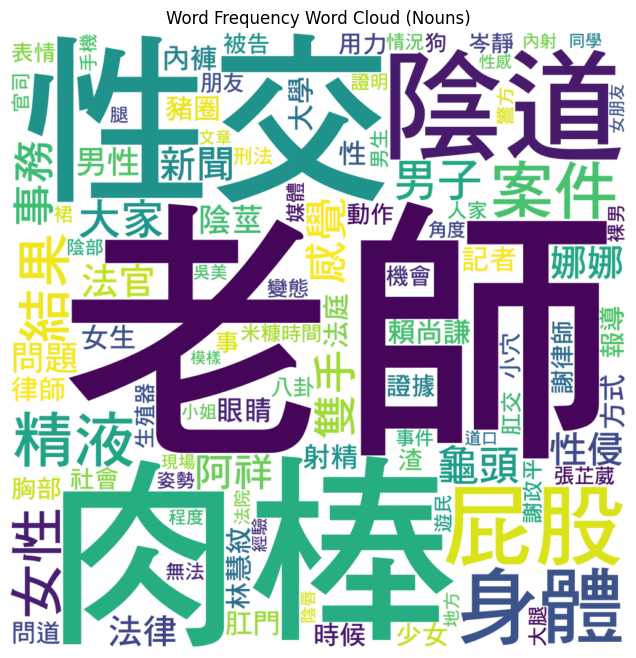

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_freq_dict = dict(zip(noun_df['word'], noun_df['count']))



wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white', max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)


max_font_size = 100


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Word Cloud (Nouns)')
plt.show()

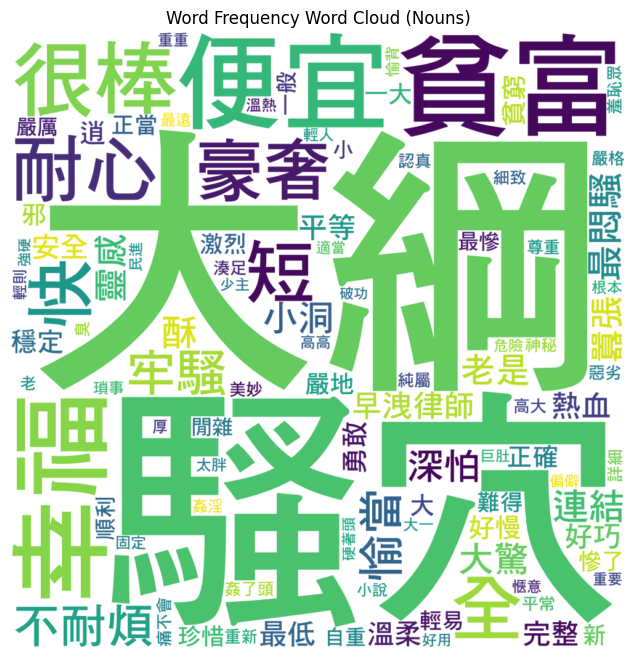

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_freq_dict = dict(zip(adj_df['word'], noun_df['count']))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white',max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)




plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Word Cloud (Nouns)')


plt.show()

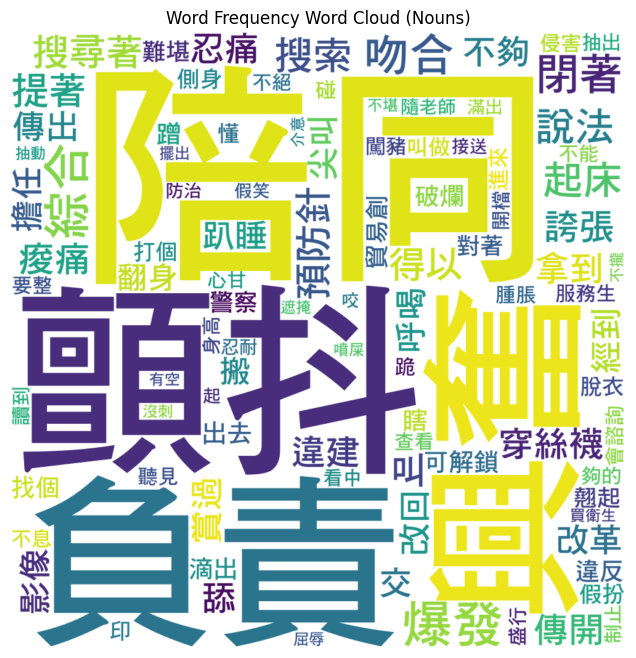

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_freq_dict = dict(zip(verb_df['word'], noun_df['count']))


wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white',max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Word Cloud (Nouns)')
plt.show()

## Relevance of Words to paragraphs and other words

In [ ]:
!pip install googletrans==4.0.0-rc1


In [ ]:
from googletrans import Translator
import random

In [ ]:
def translate_to_english(text):
    translator = Translator()
    translated_text = translator.translate(text, src='zh-TW', dest='en').text
    return translated_text

def extract_related_words(word, ptt):
    # Extract article content containing specified nouns
    relevant_texts = ptt2[ptt2['pos_tagged'].apply(lambda x: any(word in pair[0] for pair in x))]['text']


    combined_text = ' '.join(relevant_texts)

    #Divide the merged article content into words and count the number of occurrences of adjectives and verbs
    adj_counts = {}
    verb_counts = {}
    for pair in ptt['pos_tagged']:
        for word, pos in pair:
            if word == word:
                if 'a' in pos:  # 形容詞
                    adj_counts[word] = adj_counts.get(word, 0) + 1
                elif 'v' in pos:  # 動詞
                    verb_counts[word] = verb_counts.get(word, 0) + 1

    # Sort adjectives and verbs according to frequency of occurrence
    sorted_adj = sorted(adj_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    sorted_verb = sorted(verb_counts.items(), key=lambda x: x[1], reverse=True)[:5]

    # Translate adjectives and verbs into English
    translated_adj = [(translate_to_english(word), count) for word, count in sorted_adj]
    translated_verb = [(translate_to_english(word), count) for word, count in sorted_verb]

    return translated_adj, translated_verb

def analyze_word(word, ptt):
    # Task 1: Grab 10 paragraphs related to the specified word
    related_paragraphs = []
    for text in ptt2['text']:
        paragraphs = text.strip().split('\n\n')
        for paragraph in paragraphs:
            if word in paragraph:
                related_paragraphs.append(paragraph.strip())
                if len(related_paragraphs) >= 10:
                    break
        if len(related_paragraphs) >= 10:
            break

    # Task 2: Translate paragraphs to English
    translated_paragraphs = [translate_to_english(paragraph) for paragraph in related_paragraphs]

    # Task 3: Extract related words
    translated_adj, translated_verb = extract_related_words(word, ptt)

    # Print results
    print("10 random sentences containing the specified word：")
    for paragraph, translation in zip(related_paragraphs, translated_paragraphs):
        print("text：", paragraph)
        print("translated ext：", translation)

    print("\ncommon a.：", translated_adj)
    print("common v.：", translated_verb)

word = input("input：")
analyze_word(word, ptt2)


input：老師
10 random sentences containing the specified word：
text： 聖誕節當晚就要  所以只能找滯台教陰文的假陰文老師洋鮑魚了
translated ext： On Christmas night, so I can only find a fake pussy teacher who teaches Yinwen who teaches Yinwen.
text： 那5隻都是在台灣教陰文當陰文老師
translated ext： Those 5 are teachers of Yinwen Teacher in Taiwan
text： 跟一堆母語不是英語的國中程度陰文老師學英文
translated ext： Learn English with a bunch of mother tongue is not English.
text： 不過這沒有根據的自信完全來自於陳湘宜老師，
translated ext： However, this does not follow the self -confidence completely from Teacher Chen Xiangyi,
text： 表示我雖然受刑法名家陳湘宜老師的教導，而陳湘宜老師正是以行事作風之大膽聞名，
translated ext： Said that although I was taught by Mr. Chen Xiangyi, a master of criminal law, Mr. Chen Xiangyi was known for his boldness of his style.
text： 其他人，包括陳湘宜老師也幾乎是一無所知，
translated ext： Others, including Teacher Chen Xiangyi, also knew almost nothing,
text： 幸虧有陳湘宜老師幫我陪同做警詢筆錄，
translated ext： Fortunately, Teacher Chen Xiangyi helped me accompany me to make a police inquiry.
text： 所以我還是拜託陳湘宜老師陪我到警局回答詢問，之後也委任

In [ ]:
# 輸入名詞並且呼叫函數來分析
word = input("input：")
analyze_word(word, ptt2)

input：豬
10 random sentences containing the specified word：
text： 有一句話叫做
狗去豬來
反過來就是
豬去狗來
那我就在想
這隻豬
會不會剛好是母豬啊
這隻狗
會不會剛好癩皮狗啊
好巧唷
西西
有八卦嗎?
translated ext： There is a sentence called
Dogs to pigs
Conversely
Pig
Then I'm thinking
This pig
Will it happen to be a sow?
This dog
Will it happen to be a dog?
What a coincidence
Xixi
Is there any gossip?
text： 他媽突然一隻肥母豬硬要坐進來
translated ext： Suddenly a fat sow, a fat sow to sit in
text： 3.完整新聞標題:
泰噁男慾火焚身「性侵懷孕母豬」！闖豬圈直接來　牠下體腫脹
translated ext： 3. Full news title:
Thai evil man wants to burn "sexual assault of pregnant sows"!Come directly from the pigpen to the lower body swelling
text： https://cc.tvbs.com.tw/img/upload/2024/01/16/20240116224209-85a83230.jpg
一頭懷孕的母豬慘被性侵。（示意圖，非當事豬／shutterstock達志影像）
translated ext： https://cc.tvbs.com.tw/img/upload/2024/01/16/2024224209-83230.jpg
A pregnant sow was sexually assaulted.(Drama diagram, non -person pig / deckock image)
text： 誇張！泰國一名男子因慾火忍不住，直接闖進別人家的豬圈，用飼料引誘，當場性侵懷孕
的母豬，消息傳開後居民深感恐懼，目前該名男子的身分依舊是個謎，警方目前正在鎖定
該男子的足跡

# Relationship Between Words

## Word2Vec


I first used Gensim's Word2Vec model to learn vector representations of words.

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
pttW2V = Word2Vec(ptt2['chinese_tokenized'], sg=0)

In [ ]:
vocab_list = pttW2V.wv.index_to_key
print('vocab list:', vocab_list)

vocab list: ['我', '她', '有', '就', '母豬', '說', '小婕', '不', '著', '讓', '你', '被', '沒', '後', '地', '他', '對', '來', '人', '到', '上', '自己', '要', '看', '啊', '老師', '會', '於', '這樣', '才', '就是', '不是', '為', '知道', '什麼', '可以', '一個', '肉棒', '而', '性交', '還是', '真的', '好', '卻', '很', '想', '妳', '所以', '那', '從', '像', '岑靜欣', '如果', '用', '已經', '男', '因為', '陰道', '去', '怎麼', '這', '我們', '屁股', '可能', '發現', '等', '身體', '這個', '還有', '沒有', '現在', '聽', '個', '得', '只是', '話', '雖然', '或', '案件', '道', '不過', '內', '多', '竟然', '不會', '中', '一直', '進入', '其實', '精液', '之', '吳美愉', '他們', '陳', '時', '最', '下', '女', '那麼', '當時', '而且', '同時', '一', '叫', '幾乎', '可是', '剛剛', '做', '所', '一下', '有人', '幹', '結果', '大', '湘宜', '死', '女性', '男子', '年', '能', '台灣', '起來', '看到', '雙手', '幫', '那個', '有點', '吃', '不要', '罵', '感覺', '事務', '請', '一樣', '想要', '大家', '龜頭', '直接', '隻', '喔', '身上', '好像', '對方', '一起', '阿祥', '新聞', '檢察官', '小', '性侵', '們', '法官', '一邊', '娜娜', '法律', '之前', '問題', '男性', '陰莖', '應該', '賴尚謙', '畢竟', '由', '錢', '豬圈', '往', '眼睛', '內褲', '法庭', '這麼', '以', '記者', '想到', '走', '發生', '性', '肛門', '林慧紋'

In [ ]:
print(pttW2V.wv['母豬'][:10])

[-0.608098    0.43944222 -0.3212616  -0.00595934  0.61328465  0.31446952
  0.72999793  0.7188978  -0.8931901   0.08769455]


In [ ]:
pttW2V.wv.vectors

array([[-4.6962959e-01,  4.0443274e-01, -2.3989439e-01, ...,
        -5.9272647e-01,  6.1595421e-02,  3.6563035e-02],
       [-5.4257172e-01,  4.5293882e-01, -2.2756127e-01, ...,
        -6.1346740e-01,  3.4699935e-02,  5.7161357e-02],
       [-4.2106444e-01,  3.3853945e-01, -3.7083769e-01, ...,
        -5.9330815e-01,  1.4652596e-01, -6.7788564e-02],
       ...,
       [-3.2992955e-02,  2.3856245e-02, -9.3471669e-03, ...,
        -3.9970543e-02, -4.0762709e-04, -2.3034627e-03],
       [-4.3679986e-02,  3.9649889e-02, -9.3186088e-03, ...,
        -4.7947355e-02,  1.1512019e-02, -1.2037779e-03],
       [-3.9761718e-02,  4.2075891e-02, -2.5500508e-02, ...,
        -6.7392804e-02,  1.4724433e-02, -4.3165255e-03]], dtype=float32)

In [ ]:
pttW2V.wv.index_to_key[200]

'審判長'

In [ ]:
pttW2V.wv.most_similar('法律')

[('法官', 0.9996960759162903),
 ('還', 0.9996955990791321),
 ('阿祥', 0.9996944665908813),
 ('打', 0.9996917247772217),
 ('這種', 0.9996912479400635),
 ('只有', 0.9996901154518127),
 ('時間', 0.9996800422668457),
 ('已', 0.9996795654296875),
 ('律師', 0.9996774196624756),
 ('審判長', 0.9996719360351562)]

In [ ]:
pttW2V.wv.most_similar('屁股')

[('地', 0.9994679093360901),
 ('龜頭', 0.9994219541549683),
 ('雙手', 0.9994219541549683),
 ('肉棒', 0.9994094371795654),
 ('陰', 0.9993199110031128),
 ('往', 0.9992688894271851),
 ('著', 0.9991970062255859),
 ('岑靜欣', 0.9991922974586487),
 ('同時', 0.999173641204834),
 ('精液', 0.9991689324378967)]

In [ ]:
pttW2V.wv.most_similar('公主')

[('問題', 0.9977734684944153),
 ('前', 0.9977713823318481),
 ('其他', 0.9977411031723022),
 ('天', 0.9977061748504639),
 ('喔', 0.9976885318756104),
 ('您', 0.9976876974105835),
 ('們', 0.997660219669342),
 ('工作', 0.9976524710655212),
 ('果然', 0.9976490139961243),
 ('可是', 0.9976294636726379)]

In [ ]:
pttW2V.wv.most_similar('性交')

[('加重', 0.9989396333694458),
 ('對方', 0.9989254474639893),
 ('被告', 0.9988439679145813),
 ('之', 0.9988175630569458),
 ('肛交', 0.9987932443618774),
 ('罪', 0.9987801909446716),
 ('男性', 0.9987576007843018),
 ('意識', 0.9987402558326721),
 ('以', 0.9987380504608154),
 ('以上', 0.9987158179283142)]

In [ ]:
pttW2V.wv.most_similar('陰道')

[('肉棒', 0.9990948438644409),
 ('進入', 0.9990761280059814),
 ('屁股', 0.9988153576850891),
 ('龜頭', 0.9986667037010193),
 ('握住', 0.9986094832420349),
 ('陰', 0.9985377788543701),
 ('肛門', 0.9984501004219055),
 ('精液', 0.9984492063522339),
 ('內', 0.9984427094459534),
 ('插入', 0.9983921647071838)]

## Doc2Vec

Next, I create a Doc2Vec model that can learn vector representations not just of words, but of entire documents or sentences. Through these models, the code calculates the cosine similarity between keywords such as "having children", "single", "sex", "Taiwanese girl", "boy" and "problem" and visually visualizes them through heat maps These similarities are transformed to reveal the relationship between these keywords in the semantic space.

In [ ]:
keywords = ['屁股','母豬','緊','身體','老師','漂亮','短','長','積極','干','舔','肉棒','衝動']

In [ ]:
if 'level_0' in ptt2.columns:
    pttDF = ptt2.drop(columns=['level_0'])


pttDF = ptt2.reset_index(drop=True)

print(pttDF[:20])


                       author      board                      tittle     date  \
0         ptt987654321 (大谷躺平)  Gossiping     [問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?  2024-02   
1              ashilol (ting)  Gossiping        [問卦] 捷運有母豬一直擠我要怎麼處理？  2024-01   
2                 kent (大屌肯特)  Gossiping     [新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬  2024-01   
3             davidex (玉藻前我的)  Gossiping    [新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」  2024-01   
4               vi000246 (Vi)  Gossiping               [問卦] 黑鏡有一集幹母豬  2024-01   
5         yushenglu (子欲養而親不待)  Gossiping        [問卦] 快8年了,母豬一直聽不懂人話?  2024-01   
6             TOMMY75410 (禿米)  Gossiping     [問卦] 我朋友去陳情，母豬還在睡怎麼辦^_^  2023-12   
7      ggian123 (釣白癡&散播仇恨專用帳)  Gossiping       [問卦] CCR崇洋母豬話都講不好 吃屎吧  2023-12   
8         ilovecat5566 (....)  Gossiping     [問卦] 被母豬騙3次的人在想什麼？ 有沒有卦  2023-12   
9             ubang (長得醜卻想得美)  Gossiping        [問卦] 是死豬還是死母豬不怕滾水燙？？  2023-11   
10  Max0406 (LeGOATKingJames)  Gossiping    [問卦] Skylar Vox 變成肥滋滋的母豬  2023-11   
11      j8004150560 (jumpyou

In [ ]:
import gensim
import sklearn.metrics.pairwise


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in ptt2.iterrows():
    docKeywords = [s for s in keywords if s in row['chinese_tokenized']]
    docKeywords.append(row['date'])

    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words=row['chinese_tokenized'], tags=docKeywords))
ptt2['TaggedAbstracts'] = taggedDocs

In [ ]:
pttD2V = gensim.models.doc2vec.Doc2Vec(ptt2['TaggedAbstracts'], vector_size = 75)

In [ ]:
pttD2V['漂亮']

array([-1.42968848e-01, -1.24490172e-01, -9.15005431e-03, -1.04782492e-01,
       -6.13860181e-03, -3.45037691e-02, -1.15249366e-01,  5.48701771e-02,
       -1.54316977e-01,  3.26819122e-02,  6.10563904e-02, -1.15350941e-02,
        1.75768398e-02,  6.94012344e-02, -4.00394499e-02,  1.89354920e-04,
        9.62513760e-02,  7.27462620e-02, -1.71492592e-01, -2.27075648e-02,
        6.38038665e-02, -4.85479645e-02, -4.33551371e-02,  3.73110883e-02,
        4.99173887e-02, -1.07843883e-01, -9.93899703e-02, -1.21011041e-01,
       -5.71513996e-02, -1.46418154e-01,  1.70351490e-01,  6.75308704e-02,
       -9.93958712e-02,  1.42624788e-02, -5.00366129e-02,  4.39531058e-02,
        6.14899620e-02, -1.22125678e-01, -6.76783081e-03,  9.02250484e-02,
       -7.51723200e-02,  5.48785366e-02,  4.52160090e-02, -8.34694281e-02,
        2.20837016e-02, -2.23840013e-01,  2.57624090e-02, -7.15108290e-02,
        1.63784206e-01,  1.19544156e-01, -9.90611613e-02, -3.63095216e-02,
       -9.39667374e-02, -

In [ ]:
pttD2V.wv.most_similar(positive = ['漂亮','母豬'], negative = ['男性'], topn = 1)

[('卻', 0.9480656981468201)]

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['結婚'] ], topn=5 )

<ipython-input-69-08058018d5db>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pttD2V.docvecs.most_similar([ pttD2V['結婚'] ], topn=5 )


[('母豬', 0.9275098443031311),
 ('2021-08', 0.9192849397659302),
 ('2016-11', 0.9167258143424988),
 ('2021-05', 0.8877168893814087),
 ('2016-10', 0.8874622583389282)]

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(pttD2V['工作'].reshape(1,-1),pttD2V['女生'].reshape(1,-1))

array([[0.5938894]], dtype=float32)

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['小孩']+pttD2V['單身']+pttD2V['性']], topn=5 )

<ipython-input-72-928fde3e107d>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pttD2V.docvecs.most_similar([ pttD2V['小孩']+pttD2V['單身']+pttD2V['性']], topn=5 )


[('短', 0.945418655872345),
 ('2023-09', 0.9378157258033752),
 ('2024-01', 0.8370600342750549),
 ('2017-07', 0.8236998319625854),
 ('2016-10', 0.8146190643310547)]

In [ ]:
import numpy as np

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = pttD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

<ipython-input-74-7cd96485bcca>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  tagVec = pttD2V.docvecs[tagOuter].reshape(1, -1)
<ipython-input-74-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-74-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-74-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-74-7cd96485bcca>:6: DeprecationWarning: Call to deprecate

In [ ]:
from matplotlib.font_manager import FontProperties
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import numpy as np

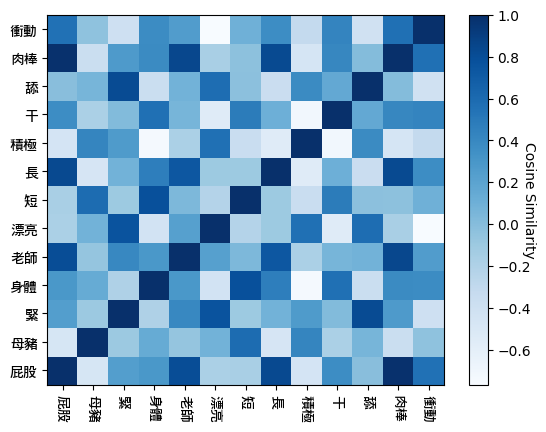

In [ ]:

font_path = '/content/drive/MyDrive/SOCI40133/粗黑體.ttc'
font_prop = FontProperties(fname=font_path)

fig, ax = plt.subplots()


# 根据数据标准化并选择藍色由淺到深的 colormap
norm = Normalize(vmin=heatmapMatrix.min(), vmax=heatmapMatrix.max())
hmap = ax.pcolor(heatmapMatrix, cmap='Blues', norm=norm)

# 设置 colorbar
cbar = plt.colorbar(hmap)
cbar.set_label('Cosine Similarity', rotation=270)


a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(font_prop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(font_prop)

plt.show()


# Relationships Between Post Types

## Data visualization in 2D

In [ ]:
embedding_model = "text-embedding-3-small"
embedding_encoding = "cl100k_base"
max_tokens = 800  # the maximum for text-embedding-3-small is 8191

In [ ]:
!pip install tiktoken
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=48cc58947b12edb80b5609c59dd18b3ef7761edb68853c9a0815d0e1669aa16d
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
ptt2

,author,board,tittle,date,article_type,text,chinese_tokenized,pos_tagged,TaggedAbstracts
0,ptt987654321 (大谷躺平),Gossiping,[問卦] 豬去狗來，豬是母豬嗎?狗是癩皮狗嗎?,2024-02,問卦,有一句話叫做\n狗去豬來\n反過來就是\n豬去狗來\n那我就在想\n這隻豬\n會不會剛好是母...,"[有, 一句, 話, 叫做, 狗, 去, 豬來, 反過, 來, 就是, 豬去, 狗, 來, ...","[(有, v), (一句, m), (話, n), (叫做, v), (狗, n), (去,...","([有, 一句, 話, 叫做, 狗, 去, 豬來, 反過, 來, 就是, 豬去, 狗, 來,..."
1,ashilol (ting),Gossiping,[問卦] 捷運有母豬一直擠我要怎麼處理？,2024-01,問卦,安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...,"[安安, 吶, 肥肥, 捷運, 正坐, 好好, 他媽, 突然, 一, 隻, 肥, 母豬, 硬...","[(安安, ns), (吶, zg), (肥肥, n), (捷運, nz), (正坐, v)...","([安安, 吶, 肥肥, 捷運, 正坐, 好好, 他媽, 突然, 一, 隻, 肥, 母豬, ..."
2,kent (大屌肯特),Gossiping,[新聞] 泰噁男慾火焚身「性侵懷孕母豬」！闖豬,2024-01,新聞,1.媒體來源:\nTVBS\n\n2.記者署名:\n陳樂珊\n\n3.完整新聞標題:\n泰噁...,"[媒體, 來源, 記者, 署名, 陳樂珊, 完整, 新聞, 標題, 泰, 噁男, 慾, 火焚...","[(媒體, n), (來源, n), (記者, n), (署名, v), (陳樂珊, n),...","([媒體, 來源, 記者, 署名, 陳樂珊, 完整, 新聞, 標題, 泰, 噁男, 慾, 火..."
3,davidex (玉藻前我的),Gossiping,[新聞] 米糠誘惑！變態裸男潛入「性侵懷孕母豬」,2024-01,新聞,1.媒體來源:\n壹蘋\n\n2.記者署名:\n劉育良／綜合報導\n\n3.完整新聞標題:\...,"[媒體, 來源, 壹蘋, 記者, 署名, 劉育良, 綜合, 報導, 完整, 新聞, 標題, ...","[(媒體, n), (來源, n), (壹, m), (蘋記, n), (者, k), (署...","([媒體, 來源, 壹蘋, 記者, 署名, 劉育良, 綜合, 報導, 完整, 新聞, 標題,..."
4,vi000246 (Vi),Gossiping,[問卦] 黑鏡有一集幹母豬,2024-01,問卦,聽說黑鏡有一集是有個人一直被威脅\n最後只好幹母豬\n還全國直播給大家看\n怎麼那麼重口味阿...,"[聽, 說, 黑鏡, 有, 一集, 有, 個, 人, 一直, 被, 威脅, 最, 後, 只好...","[(聽, v), (說, v), (黑鏡, n), (有, v), (一集, m), (有個...","([聽, 說, 黑鏡, 有, 一集, 有, 個, 人, 一直, 被, 威脅, 最, 後, 只..."
...,...,...,...,...,...,...,...,...,...
413,success0409 (貢糖新衣),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n\n\n目前比較流行的「女性主義」(19:09更改)或說兩性平權\n\n確實是要社會中的...,"[目前, 比較, 流行, 女性, 主義, 更改, 或, 說, 兩性, 平權, 確實, 要, ...","[(目前, t), (比較, d), (流行, v), (女性, n), (主義, n), ...","([目前, 比較, 流行, 女性, 主義, 更改, 或, 說, 兩性, 平權, 確實, 要,..."
414,sdewazx (我是純種吱吱),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,補個版上標題 (不含推文)\n\n[新聞] 給渣男空間他狂偷吃 她領悟徹底心碎\n\n[心情...,"[補個, 版, 上, 標題, 不含, 推文, 新聞, 給渣, 男空間, 他, 狂, 偷吃, ...","[(補, v), (個, q), (版, n), (上, f), (標題, n), (不含,...","([補個, 版, 上, 標題, 不含, 推文, 新聞, 給渣, 男空間, 他, 狂, 偷吃,..."
415,qazieru (=w=),WomenTalk,Re: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n\n渣男垂涎「幼毛」 噁稱：摸她屁股全身發抖\n\n四大特徵，教妳如何分辨渣男\n\n渣...,"[渣, 男, 垂涎, 幼毛, 噁, 稱, 摸, 她, 屁股, 全身, 發抖, 四大, 特徵,...","[(渣男, nt), (垂涎, v), (幼, ag), (毛, nr), (噁, zg),...","([渣, 男, 垂涎, 幼毛, 噁, 稱, 摸, 她, 屁股, 全身, 發抖, 四大, 特徵..."
416,TrashGsir (垃圾G色),WomenTalk,Fw: [新聞] 母豬誣告失敗 羅斯反求償224萬,2016-11,新聞,\n作者: tmacor1 (賣冰淇淋的車子) 看板: Gossiping\n標題: [新聞...,"[作者, 賣, 冰淇淋, 車子, 看, 板, 標題, 新聞, 母豬, 誣告, 失敗, 羅, ...","[(作者, n), (賣, x), (冰淇淋, nr), (車子, n), (看板, n),...","([作者, 賣, 冰淇淋, 車子, 看, 板, 標題, 新聞, 母豬, 誣告, 失敗, 羅,..."


In [ ]:
matrix = ptt2[['article_type']].to_numpy()

In [ ]:
unique_boards = ptt2['article_type'].unique()
print(unique_boards)


['問卦' '新聞' '芙莉蓮' '間諜' '討論' '閒聊' '情報' '巨人' '村田' '公告' '黑特' '心得' '創作' '心情'
 '震怒' '煩耶' '難過' '問題']


In [ ]:
# 创建中英文对照字典
translation_dict = {
    '問卦': 'gossiping',
    '新聞': 'news',
    '芙莉蓮': 'floreane',
    '間諜': 'spy',
    '討論': 'discussion',
    '閒聊': 'chat',
    '情報': 'information',
    '巨人': 'giant',
    '村田': 'murata',
    '公告': 'announcement',
    '黑特': 'hate',
    '心得': 'experience',
    '創作': 'creation',
    '心情': 'mood',
    '震怒': 'anger',
    '煩耶': 'annoyance',
    '難過': 'sadness',
    '問題': 'problem'
}

# 在 DataFrame 中替换中文值为英文值
ptt2['article_type'] = ptt2['article_type'].replace(translation_dict)


In [ ]:
# Create a mapping dictionary to map the board content to the specified numerical values
type_mapping = {
    'gossiping': 1,
    'news': 2,
    'floreane': 3,
    'spy': 4,
    'discussion': 5,
    'chat': 6,
    'information': 7,
    'giant': 8,
    'murata': 9,
    'announcement': 10,
    'hate': 11,
    'experience': 12,
    'creation': 13,
    'mood': 14,
    'anger': 15,
    'annoyance': 16,
    'sadness': 17,
    'problem': 18
}

# Use the replace() function for mapping
ptt2['article_type'] = ptt2['article_type'].replace(type_mapping)


In [ ]:
from sklearn.manifold import TSNE

# Create a t-SNE model
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)



In [ ]:
ptt2 = ptt2.dropna(subset=['article_type'])

In [ ]:
# Fit and transform the data
vis_dims = tsne.fit_transform(ptt2[['article_type']])

<ipython-input-97-c6360f6c845f>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', max(ptt2['article_type'])+1)  # Choose a colormap suitable for categorical data


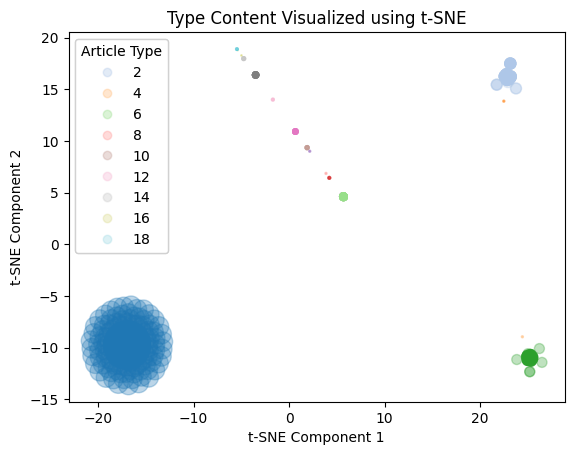

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors

# Extract the x and y coordinates
x = vis_dims[:, 0]
y = vis_dims[:, 1]

# Get the counts for each board for the sizing of the points
board_counts = ptt2['article_type'].value_counts()
sizes = [board_counts[val] for val in ptt2['article_type']]

# Create a colormap
colormap = plt.cm.get_cmap('tab20', max(ptt2['article_type'])+1)  # Choose a colormap suitable for categorical data

# Scatter plot
scatter = plt.scatter(x, y, c=ptt2['article_type'], cmap=colormap, s=sizes, alpha=0.3) # Adjust alpha to match the opacity in your first plot

# Title and labels
plt.title("Type Content Visualized using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Article Type")
plt.gca().add_artist(legend1)

# Show the plot
plt.show()


# Emotion Analysis

## snownlp

Next, I calculated the sentiment score for each article

In [ ]:
!pip install snownlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760944 sha256=86fab26c9a37ce2ea861622b14b4315150b34385dbeb2665f6c0d171d62dc70e
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [ ]:
from snownlp import SnowNLP
import pandas as pd


def get_sentiment_score(text):
    s = SnowNLP(text)
    return 2 * s.sentiments - 1

ptt2['sentiment_score'] = ptt2['text'].apply(get_sentiment_score)

print(ptt2[['text', 'sentiment_score']])


                                                  text  sentiment_score
0    有一句話叫做\n狗去豬來\n反過來就是\n豬去狗來\n那我就在想\n這隻豬\n會不會剛好是母...        -0.979147
1    安安吶\n\n肥肥捷運正坐的好好的\n\n他媽突然一隻肥母豬硬要坐進來\n\n我已經跟右邊牆...        -0.996713
2    1.媒體來源:\nTVBS\n\n2.記者署名:\n陳樂珊\n\n3.完整新聞標題:\n泰噁...        -1.000000
3    1.媒體來源:\n壹蘋\n\n2.記者署名:\n劉育良／綜合報導\n\n3.完整新聞標題:\...        -1.000000
4    聽說黑鏡有一集是有個人一直被威脅\n最後只好幹母豬\n還全國直播給大家看\n怎麼那麼重口味阿...         0.539636
..                                                 ...              ...
413  \n\n\n目前比較流行的「女性主義」(19:09更改)或說兩性平權\n\n確實是要社會中的...        -1.000000
414  補個版上標題 (不含推文)\n\n[新聞] 給渣男空間他狂偷吃　她領悟徹底心碎\n\n[心情...        -1.000000
415  \n\n渣男垂涎「幼毛」　噁稱：摸她屁股全身發抖\n\n四大特徵，教妳如何分辨渣男\n\n渣...        -1.000000
416  \n作者: tmacor1 (賣冰淇淋的車子) 看板: Gossiping\n標題: [新聞...        -1.000000
417  \n只要使用公豬或母豬來指稱特定板友或男性、女性皆屬違規，\n這點已有判例。\n\n[新聞]...        -0.999999

[418 rows x 2 columns]


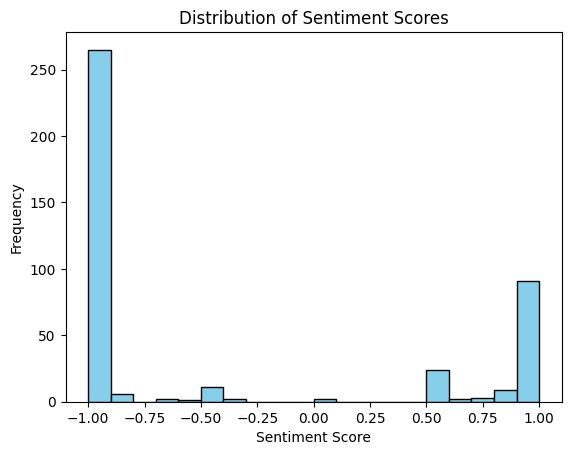

In [ ]:
import matplotlib.pyplot as plt


plt.hist(ptt2['sentiment_score'], bins=20, color='skyblue', edgecolor='black')


plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')


plt.show()


## Check out articles related to negative emotions

In [ ]:
from collections import Counter

# Split text into words and calculate word frequency
words = ' '.join(ptt2[ptt2['sentiment_score'] < 0]['text']).split()
word_counts = Counter(words)

# Print the most frequently occurring negative emotion words
negative_keywords = [word for word, count in word_counts.items() if count > 10]
print(negative_keywords)


['有一句話叫做', '狗去豬來', '反過來就是', '豬去狗來', '那我就在想', '這隻豬', '會不會剛好是母豬啊', '這隻狗', '會不會剛好癩皮狗啊', '好巧唷', '西西', '有八卦嗎?', '安安吶', '肥肥捷運正坐的好好的', '他媽突然一隻肥母豬硬要坐進來', '我已經跟右邊牆壁幾乎貼在一起了', '她還是一直緊貼我大腿', '嘔嘔嘔真的要吐了', '現在怎麼辦？', 'https://i.imgur.com/MqBZYfV.jpeg', '1.媒體來源:', 'TVBS', '2.記者署名:', '陳樂珊', '3.完整新聞標題:', '泰噁男慾火焚身「性侵懷孕母豬」！闖豬圈直接來', '牠下體腫脹', '4.完整新聞內文:', 'https://cc.tvbs.com.tw/img/upload/2024/01/16/20240116224209-85a83230.jpg', '一頭懷孕的母豬慘被性侵。（示意圖，非當事豬／shutterstock達志影像）', '誇張！泰國一名男子因慾火忍不住，直接闖進別人家的豬圈，用飼料引誘，當場性侵懷孕', '的母豬，消息傳開後居民深感恐懼，目前該名男子的身分依舊是個謎，警方目前正在鎖定', '該男子的足跡。', '綜合泰媒等的報導，這起誇張的事件發生在本月13日，晚間10時左右，地點位於泰國東北', '部的武里南府。根據女飼主透露孔女士透露，她飼養了3頭豬，豬圈距離她家大約20公尺', '。', '事發當時，她正在網絡搜索如何幫豬生產的資訊，突然聽見屋外傳出奇怪的吼叫聲，起初', '孔女士以為是母豬早產，當她望向窗外時，竟然看見1名身高大約155公的裸男正在性侵她', '懷孕的豬，孔女士不敢出去查看，因此她只能在臥室大聲喊叫，試圖阻止男子變態的行為', '，這名男子聽見喊叫聲後，便趕快逃走。', '警方隨後趕到了現場後，發現母豬的生殖器官有腫脹的現象，並在豬圈附近發現有許多散', '落的米糠和腳印，推測男子是用米糠吸引母豬。目前嫌犯仍逍遙法外，身分仍是個謎與，', '居民也深感恐懼。', '《TVBS》提醒您勇敢說不：', '◎尊重身體自主權，遇到性騷擾勇於制止、勇敢說不，請撥打113、110', '◎現代婦女基金會', '性侵害防治服務專線02-7728-5098分機7', '◎婦女救援基金

In [ ]:
# Print the context of the text with the lowest negative sentiment score
low_sentiment_texts = ptt2.sort_values('sentiment_score').head(5)['text']
for text in low_sentiment_texts:
    print("Text: ", text)
    # print("Context: ", ...)
    print("----------------------------------")



Text:  
我的事務所是開了，可是問題是沒有生意。

父母親的人脈是可以幫我介紹一些CASE來應付剛開始的開銷，

但是法律事務所要走到最後，一定是取決於前面幾件案件的勝負；

要是剛開始就連敗開局，以後就不可能再有人來委託，所以我不能亂接案件，

我要接我願意全心全意奮戰的案件，而且是有勝算的案件。



我最想贏的案件就是和母豬的戰鬥，我有信心，而且一定要贏！



而且我需要一個助理，最好是年輕貌美的那種！



事務所開幕前一個月，好不容易才有人上門應徵，

我想跟我媽在人力銀行上薪水開23100到23100應該有絕對的關係。

不過這裡是南部，再高的薪水我也給不起，

雖然我們市長說要人人發大財，但在那之前我要避免餓死。



難得有人來應徵，而且是女性，我想我沒有挑剔太多的本錢，

再拖下去要是事務所開張那天還要我自己開門說irassyaimase，

那不是太落漆了嗎？我需要門面！



來應徵的這個女生，年紀應該比我大，

畢竟我才23歲，因為扁平足免役，可以專心衝刺事業，

而對方看起來漂亮是漂亮，卻一副歷盡滄桑的模樣，年紀是28歲，屬於輕熟女了，

雖然她都說自己是女孩兒。



她是我第一個應徵的員工，也是後來跟我上刀山下油鍋的開朝元老，叫做小婕。



她私立大學冷門科系畢業後，在北部當了幾年櫃姐，

最後在身心受創下決定回南部找工作，

電腦中打一分鐘20字，使用注音符號ㄥㄣ不分的注音輸入法。



小婕姐姐，好吧，她要我稱呼她時不要加上姐姐，畢竟人家是女孩兒，

我就僭越地只叫她小婕，雖然她大我五歲，一點也不小，

尤其是胸部，目測有D罩杯。



小婕雖然五官清麗，眼睛很大還會勾人，鼻子也比多數人整形過後還挺，

留著一頭可以拍「Lux super rich」廣告的長髮；

但由於多年在北部目標只是找個super rich的老公嫁掉，所以氣質已經走鐘了；

滿嘴「屁啦」、「幹咧」，偶爾還抽菸的她，

讓我這個從小書呆子環境長大的阿宅感到很不齒，

可惜用人在即，只好忍受這個拜金女。



我不敢當她的面說我的目標是藉著打官司撲滅天下的母豬，

只是隱諱地說，相對於女權自助餐人士一天到晚說要爭取女權，

結果需要她們付出時就一句「人家女生耶」，

像自助餐般只選自己喜歡吃的，

在女權議題上只想享受權利而不用相同標準要求自己去盡義務，

## Sentiment Score vs. Year

In [ ]:
import matplotlib.pyplot as plt

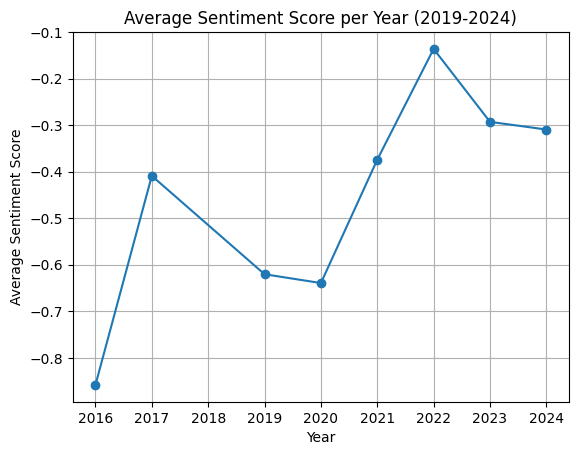

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime type
ptt2['date'] = pd.to_datetime(ptt2['date'])

# Extract the year from the 'date' column
ptt2['year'] = ptt2['date'].dt.year

# Group by year and calculate the average sentiment score
yearly_avg_sentiment = ptt2.groupby('year')['sentiment_score'].mean()

# Plot the data
plt.plot(yearly_avg_sentiment.index, yearly_avg_sentiment.values, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Year (2019-2024)')

# Show grid
plt.grid(True)

# Show the plot
plt.show()
